# 저평가주 찾기
## 가장최근ROE, 동일업종PER,연간PBR을 구해서 저평가주를 찾자~!

In [1]:
pip install -U finance-datareader

2021-06-17
              Open    High     Low   Close   Volume    Change
Date                                                         
2021-06-04  127500  129000  126500  128500  2555891 -0.003876
2021-06-07  129500  130000  128000  128500  2562918  0.000000
2021-06-08  127000  127500  125000  127500  4194955 -0.007782
2021-06-09  125500  126000  122500  122500  6087592 -0.039216
2021-06-10  122500  124000  120500  123000  4533076  0.004082
2021-06-11  124500  128500  124000  128000  4868608  0.040650
2021-06-14  127000  127500  125500  127000  2022730 -0.007812
2021-06-15  128500  129500  128000  128500  1975082  0.011811
2021-06-16  128000  129500  127000  129500  1893752  0.007782
2021-06-17  127000  128000  126000  126500  2123793 -0.023166


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


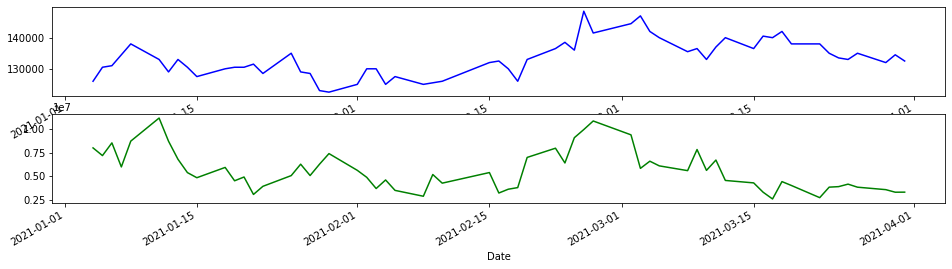

In [1]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
import urllib.parse
import pandas as pd
import numpy as np

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family='AppleGothic')

today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)

SEC = web.DataReader("000660", startday, yesterday)
# print(type(SEC))
print(SEC.tail(10))
# SEC['Close'].plot(figsize=(16,4))
plt.subplot(211)
SEC["2021-01-01":"2021-03-31"]['Close'].plot(figsize=(16,4), style='b')
plt.subplot(212)
SEC["2021-01-01":"2021-03-31"]["Volume"].plot(figsize=(16,4), style='g')

plt.show()

In [2]:
## 입력받은 데이터의 종목 코드를 확인
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}
DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'
MARKET_CODE_DICT

{'kospi': 'stockMkt', 'kosdaq': 'kosdaqMkt', 'konex': 'konexMkt'}

In [3]:
##종목 코드에 맞춰서 zfill=자릿수만큼 앞에 0으로 채워주는 함수
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

In [4]:
## 상장폐지가 아닌 상장사들만 조회
## input되는 key값에 맞는 value 값 전체가 return 됨
def stock_list(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+" market key is exist")

        
    else:
        print("invalid market")

    params_string = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL+"?"+params_string
    df = pd.read_html(request_url)[0]
    df["종목코드"] = df.종목코드.apply(zeroFill) 
    return df

In [5]:
## 유저가 입력한 주식종목의 코드 가져오기
def get_stock_number(stock_Name):
    stocks = stock_list('kospi')
    stocksRow = stocks.loc[stocks.회사명==stock_Name]
    code = stocksRow.iloc[0]['종목코드']
    return code
stockNumber = get_stock_number("SK하이닉스")

kospi market key is exist


In [6]:
# 네이버 금융 예제 크롤링 : https://hengju.tistory.com/66
from bs4 import BeautifulSoup 
import requests 
import pandas as pd

url = 'https://finance.naver.com/item/main.nhn?code=' + stockNumber
table_df_list = pd.read_html(url, encoding='euc-kr')    # 한글이 깨짐. utf-8도 깨짐. 그래서 'euc-kr'로 설정함  
table_df = table_df_list[3]

# NaN값을 0으로 채우기
table_df = table_df.fillna(0)
table_df

주요재무정보   최근 연간 실적                                   최근 분기 실적            \
       주요재무정보    2018.12    2019.12    2020.12 2021.12(E)   2020.03   2020.06   
       주요재무정보     IFRS연결     IFRS연결     IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  404451.00  269907.00  319004.00  412084.00  71989.00  86065.00   
1        영업이익  208438.00   27192.00   50126.00  122336.00   8003.00  19467.00   
2       당기순이익  155400.00   20091.00   47589.00   96274.00   6490.00  12643.00   
3       영업이익률      51.54      10.07      15.71      29.69     11.12     22.62   
4        순이익률      38.42       7.44      14.92      23.36      9.02     14.69   
5   ROE(지배주주)      38.53       4.23       9.53      17.29      3.25      4.69   
6        부채비율      35.87      36.12      37.11       0.00     39.16     40.19   
7        당좌비율      76.36      96.91      97.50       0.00     93.01    110.41   
8         유보율    1262.49    1286.81    1398.15       0.00   1285.90   1320.31   
9      EPS(원)   21346.00    2755.00    6532.00   13320.00    890.00   1735.00   
10     PER(배)       2.83      34.15      18.14       9.50     39.09     27.19   
11     BPS(원)   68488.00   70060.00   75860.00   87654.00  70513.00  72197.00   
12     PBR(배)       0.88       1.34       1.56       1.44      1.18      1.18   
13   주당배당금(원)    1500.00    1000.00    1170.00    1361.00      0.00      0.00   
14   시가배당률(%)       2.48       1.06       0.99       0.00      0.00      0.00   
15    배당성향(%)       6.60      34.10      16.83       0.00      0.00      0.00   

                                             
     2020.09   2020.12   2021.03 2021.06(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0   81288.00  79662.00  84942.00   97713.00  
1   12997.00   9659.00  13244.00   26375.00  
2   10779.00  17677.00   9926.00   18984.00  
3      15.99     12.13     15.59      26.99  
4      13.26     22.19     11.69      19.43  
5       5.80      9.53     10.13       0.00  
6      37.16     37.11     43.41       0.00  
7     105.45     97.50     99.02       0.00  
8    1349.64   1398.15   1403.15       0.00  
9    1480.00   2427.00   1360.00    2631.00  
10     21.36     18.14     18.92      48.09  
11  73800.00  75860.00  76542.00       0.00  
12      1.14      1.56      1.73       0.00  
13      0.00      0.00      0.00       0.00  
14      0.00      0.00      0.00       0.00  
15      0.00      0.00      0.00       0.00

# 가장 최근 ROE구하기 

In [7]:
table_df.iloc[5]

ROE=np.where(table_df.iloc[5][-1]==0,table_df.iloc[5][-2],table_df.iloc[5][-1])
ROE

# 가장 최근 ROE찾는 함수
def ROE_finder():
    if (table_df.iloc[5][-1]==0):
        ROE = table_df.iloc[5][-2]
    else:
        ROE = table_df.iloc[5][-1]
    return ROE

recent_ROE = ROE.tolist()
recent_ROE

10.13

# 동일업종 PER 구하기

In [8]:
table_df_list[9]
PER_Avg=table_df_list[9]

sameBusinessPER = float(PER_Avg[1][0].split("배")[0])
sameBusinessPER

17.08

# 최근 연간실적과 최근 분기실적으로 테이블 나누기

In [9]:
## 행과 열을 바꾸는 힘수
stockModel = table_df.transpose() 
stockModel
type(stockModel)
columns1=stockModel.loc['주요재무정보']

columns2=stockModel.loc['최근 연간 실적']

columns3=stockModel.loc['최근 분기 실적']

#  최근 연간 실적

In [10]:
# 최근연간실적 컬럼 인덱스에  삽입
# 0번째 행을 조회 
columns1.iloc[0] 

# 최근 연간 실적(columns2를 인덱스에 삽입)
columns2.columns = columns1.iloc[0]
recent_AnuualPerformance = columns2
recent_AnuualPerformance

# 평균값 행 제거
AnuualInfo=recent_AnuualPerformance.iloc[0:3]
AnuualInfo

,"(주요재무정보, 주요재무정보)",매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
2018.12,IFRS연결,404451.0,208438.0,155400.0,51.54,38.42,38.53,35.87,76.36,1262.49,21346.0,2.83,68488.0,0.88,1500.0,2.48,6.6
2019.12,IFRS연결,269907.0,27192.0,20091.0,10.07,7.44,4.23,36.12,96.91,1286.81,2755.0,34.15,70060.0,1.34,1000.0,1.06,34.1
2020.12,IFRS연결,319004.0,50126.0,47589.0,15.71,14.92,9.53,37.11,97.5,1398.15,6532.0,18.14,75860.0,1.56,1170.0,0.99,16.83


### 최근 연간 실적에서 동일업종PER구하기(동일업종PER보다 작으면 좋은 지표)

In [11]:
AnuualInfo.iloc[:]["PER(배)"]

recent_PER = float(AnuualInfo.iloc[:]["PER(배)"][-1])

final_AnuualInfo = False
if (recent_PER <= sameBusinessPER ):
    final_AnuualInfo = True
else : 
    final_AnuualInfo = False

### 최근 연간 실적에서 PBR 살펴보기(1 미만이면 저평가주일 가능성 있음)

In [12]:
AnuualInfo

Anuual_PBR = AnuualInfo["PBR(배)"]

final_AnuualPBR = list(Anuual_PBR)

for i in range(len(final_AnuualPBR)):
    if ( float(final_AnuualPBR[i]) < 1 ):
        print(i , "1 미만 : ", final_AnuualPBR[i])
        print(i , "PBR이 1미만이므로 저평가주일 가능성이 있습니다.")
    else:
        print(i ,"1 초과 : ",final_AnuualPBR[i])

0 1 미만 :  0.88
0 PBR이 1미만이므로 저평가주일 가능성이 있습니다.
1 1 초과 :  1.34
2 1 초과 :  1.56


#  최근 분기 실적

In [13]:
# 최근연간실적 컬럼 인덱스에  삽입
# 0번째 행을 조회 
columns1.iloc[0] 

# 최근 연간 실적(columns2를 인덱스에 삽입)
columns3.columns = columns1.iloc[0]
recent_QuarterPerformance = columns3

# 평균값 행 제거
QurterInfo=recent_QuarterPerformance.iloc[0:5]
QurterInfo

,"(주요재무정보, 주요재무정보)",매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
2020.03,IFRS연결,71989.0,8003.0,6490.0,11.12,9.02,3.25,39.16,93.01,1285.9,890.0,39.09,70513.0,1.18,0.0,0.0,0.0
2020.06,IFRS연결,86065.0,19467.0,12643.0,22.62,14.69,4.69,40.19,110.41,1320.31,1735.0,27.19,72197.0,1.18,0.0,0.0,0.0
2020.09,IFRS연결,81288.0,12997.0,10779.0,15.99,13.26,5.8,37.16,105.45,1349.64,1480.0,21.36,73800.0,1.14,0.0,0.0,0.0
2020.12,IFRS연결,79662.0,9659.0,17677.0,12.13,22.19,9.53,37.11,97.5,1398.15,2427.0,18.14,75860.0,1.56,0.0,0.0,0.0
2021.03,IFRS연결,84942.0,13244.0,9926.0,15.59,11.69,10.13,43.41,99.02,1403.15,1360.0,18.92,76542.0,1.73,0.0,0.0,0.0


### 최근 ROE보다 값이 큰 ROE를 최근 분기실적에서 구하기

In [14]:
QurterInfo.iloc[-1][5]

### 가장 최근 ROE가 0일때 예외처리
recent_ROE=np.where(QurterInfo.iloc[-1][5]==0,QurterInfo.iloc[-1][4],QurterInfo.iloc[-1][5])
recent_ROE

# 가장 최근 ROE찾는 함수
def ROE_finder():
    if (QurterInfo.iloc[-1][5]==0):
        recent_ROE = QurterInfo.iloc[-1][4]
    else:
        recent_ROE = QurterInfo.iloc[-1][5]
    return recent_ROE

recent_ROE

array(10.13)

# 결론

In [15]:
if((recent_PER == True) and (final_QurterROE >= recent_ROE)):
    print("저평가주로 추정됩니다, 매수추천.")
elif((recent_PER == True) and (final_QurterROE < recent_ROE)):
    print("동종업계 PER보다 PER이 낮으며 최근 ROE보다 매수하려는 ROE가 낮습니다, 매수를 고민해보세요.")
elif((recent_PER == False) and (final_QurterROE >= recent_ROE)):
    print("최근 ROE보다 매수하려는 ROE가 같거나 높습니다, 동종업계 PER보다 PER이 높습니다, 매수를 고민해보세요.")
else:
    print("저평가주가 아닌것 같습니다, 매수비추천")
    
# PER은 낮을수록, ROE는 높을수록 저평가주이다.

저평가주가 아닌것 같습니다, 매수비추천
